In [49]:
# https://www.youtube.com/watch?v=tGpMb8R9D9M&t=994s

In [50]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
# import os
import matplotlib.pyplot as plt
# %matplotlib widget




import datetime as dt
from binance.client import Client

from ta.momentum import rsi
from ta.trend import ema_indicator



In [51]:
def spike_detect(price, order=5):
    
    ## for i in range(100, len(price)):
    # peaks_idx = list(argrelextrema(price.Close.values[:i], np.greater, order=order)[0])
    # troughs_idx = list(argrelextrema(price.Close.values[:i], np.less, order=order)[0])

    peaks_idx = list(argrelextrema(price.High.values[:i], np.greater, order=order)[0])
    troughs_idx = list(argrelextrema(price.Low.values[:i], np.less, order=order)[0])

    idx = peaks_idx + troughs_idx # not assuming the last candle is a spike
    idx.sort()

    

    current_idx = idx[-5:]
    current_pat = (price.Close.values[current_idx])
    current_pat_H = (price.High.values[current_idx])
    current_pat_L = (price.Low.values[current_idx])

    start = min(current_idx)
    end = max(current_idx)
    
    return current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx

In [52]:
# spike_detect(df, order=5)

In [53]:
def is_gartley(ertiyab = 0.11):

    if len(current_idx) == 5:

        # Bulish Gartley

        XAu = current_pat_H[1] - current_pat_L[0]
        ABu = current_pat_L[2] - current_pat_H[1]
        BCu = current_pat_H[3] - current_pat_L[2]
        CDu = current_pat_L[4] - current_pat_H[3]

        ADu = current_pat_L[4] - current_pat_H[1]

        AB_range = np.array([0.618 - ertiyab, 0.618 + ertiyab ])*abs(XAu)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABu)
        CD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(BCu)

        AD_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAu)


        if (current_idx[0] in troughs_idx) and (current_idx[1] in peaks_idx) \
        and (current_idx[2] in troughs_idx) and (current_idx[3] in peaks_idx) and (current_idx[4] in troughs_idx):

            if XAu>0 and ABu<0 and BCu>0 and CDu<0 and ADu<0:

                if AB_range[0]<abs(ABu)<AB_range[1] and BC_range[0]<abs(BCu)<BC_range[1] and CD_range[0]<abs(CDu)<CD_range[1] \
                    and AD_range[0]<abs(ADu)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 11
                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan


            

                # Bearish Gartley

        XAd = current_pat_L[1] - current_pat_H[0]
        ABd = current_pat_H[2] - current_pat_L[1]
        BCd = current_pat_L[3] - current_pat_H[2]
        CDd = current_pat_H[4] - current_pat_L[3]
        ADd = current_pat_H[4] - current_pat_L[1]

        AB_range = np.array([0.618 - ertiyab, 0.618 + ertiyab ])*abs(XAd)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABd)
        CD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(BCd)

        AD_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAd)

        if (current_idx[0] in peaks_idx) and (current_idx[1] in troughs_idx) \
        and (current_idx[2] in peaks_idx) and (current_idx[3] in troughs_idx) and (current_idx[4] in peaks_idx):

            if XAd<0 and ABd>0 and BCd<0 and CDd>0 and ADd>0 :

                if AB_range[0]<abs(ABd)<AB_range[1] and BC_range[0]<abs(BCd)<BC_range[1] and CD_range[0]<abs(CDd)<CD_range[1] \
                    and AD_range[0]<abs(ADd)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -11

                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan







In [54]:
def is_butterfly(ertiyab = 0.11):

    if len(current_idx) == 5:

        # Bulish butterfly

        XAu = current_pat_H[1] - current_pat_L[0]
        ABu = current_pat_L[2] - current_pat_H[1]
        BCu = current_pat_H[3] - current_pat_L[2]
        CDu = current_pat_L[4] - current_pat_H[3]

        ADu = current_pat_L[4] - current_pat_H[1]

        AB_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAu)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABu)
        CD_range = np.array([1.618 - ertiyab, 2.618 + ertiyab ])*abs(BCu)

        AD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(XAu)


        if (current_idx[0] in troughs_idx) and (current_idx[1] in peaks_idx) \
        and (current_idx[2] in troughs_idx) and (current_idx[3] in peaks_idx) and (current_idx[4] in troughs_idx):

            if XAu>0 and ABu<0 and BCu>0 and CDu<0 and ADu<0 :

                if AB_range[0]<abs(ABu)<AB_range[1] and BC_range[0]<abs(BCu)<BC_range[1] and CD_range[0]<abs(CDu)<CD_range[1] \
                    and AD_range[0]<abs(ADu)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 11
                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan


            

                # Bearish butterfly

        XAd = current_pat_L[1] - current_pat_H[0]
        ABd = current_pat_H[2] - current_pat_L[1]
        BCd = current_pat_L[3] - current_pat_H[2]
        CDd = current_pat_H[4] - current_pat_L[3]

        ADd = current_pat_H[4] - current_pat_L[1]

        AB_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAd)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABd)
        CD_range = np.array([1.618 - ertiyab, 2.618 + ertiyab ])*abs(BCd)

        AD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(XAu)


        if (current_idx[0] in peaks_idx) and (current_idx[1] in troughs_idx) \
        and (current_idx[2] in peaks_idx) and (current_idx[3] in troughs_idx) and (current_idx[4] in peaks_idx):

            if XAd<0 and ABd>0 and BCd<0 and CDd>0 and ADd>0 :

                if AB_range[0]<abs(ABd)<AB_range[1] and BC_range[0]<abs(BCd)<BC_range[1] and CD_range[0]<abs(CDd)<CD_range[1] \
                    and AD_range[0]<abs(ADd)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -11

                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan







In [55]:
# # Test one pair

# # df = pd.read_csv(f"C:\\Users\Grant\Desktop\work_git\work\data\\4h\AAVEUSDT_4h.csv")
# df = pd.read_csv(f"data\\4h\AAVEUSDT_4h.csv")


# df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
# df = df.set_index(df.Time)
# price = df.copy()
# ertiyab = 0.05

# pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
# # plt.ion()

# for i in range(100, len(price)):

#     current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=5)

#     butt = is_butterfly(ertiyab)
#     gart = is_gartley(ertiyab)



#     harmonics = np.array([butt, gart])
#     labels = ['butt', 'gart']

#     if np.any(harmonics == 1) or np.any(harmonics == -1):
#         for j in range(len(harmonics)):
#             if harmonics[j] == 1 or harmonics[j] == -1:
#                 sense = 'bull' if harmonics[j] == 1 else 'bear'
#                 label =sense + labels[j] + ' found'

#                 if harmonics[j] == 1:
#                     pips+= 100*(price.Close.values[end+1:end+16] - price.Close.values[end])
                
#                 # plt.clf
#                 # plt.bar(np.arange(1,16), pips)
#                 # plt.pause(0.05)

#                 # plt.title(label)
#                 # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
#                 # plt.plot(current_idx, current_pat, c='r')
#                 # plt.show()





In [56]:
client=Client()

def get_historical_ohlc_data(symbol,days=11,interval='1h'):

    df=pd.DataFrame(client.get_historical_klines(symbol=symbol,start_str=f"{days} days ago UTC",interval=interval))
    df = df.astype(float)

    df.columns=['open_time','Open', 'High', 'Low', 'Close', 'Volume', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol','is_best_match']
    df['open_date_time']=[dt.datetime.fromtimestamp(x/1000) for x in df.open_time]
    # df['symbol']=symbol
    df=df[['open_date_time','Open', 'High', 'Low', 'Close', 'Volume']]
    df.set_index('open_date_time', inplace=True)


    return df

In [57]:
# timeframes = ["1h"]

# pairs= ['HOTUSDT', 'ARUSDT', 'SYSUSDT', 'CKBUSDT', 'CTXCUSDT', 'DOGEUSDT', 'ETCUSDT', 'FILUSDT', 'FIROUSDT', 'LTCUSDT', 'KMDUSDT', 'RVNUSDT', 'SCUSDT', 'XLMUSDT', 'XMRUSDT', 'XRPUSDT', 'ZECUSDT', 'ZENUSDT', 'DGBUSDT', 'DASHUSDT', 'BCHUSDT', 'RNDRUSDT', 'VETUSDT', 'VTHOUSDT', 'KDAUSDT', 'NKNUSDT', 'ARBTC', 'SYSBTC', 'CTXCBTC', 'DOGEBTC', 'ETCBTC', 'FILBTC', 'FIROBTC', 'LTCBTC', 'KMDBTC', 'RVNBTC', 'XLMBTC', 'XMRBTC', 'XRPBTC', 'ZECBTC', 'ZENBTC', 'DGBBTC', 'DASHBTC', 'BCHBTC', 'RNDRBTC', 'VETBTC', 'KDABTC', 'NKNBTC']

# # pairs=['BNBUSDT']

# candy =[]

# for timeframe in timeframes:

#     for symbol in pairs:

#         df = get_historical_ohlc_data(symbol,days=11, interval=timeframe)

#         print(symbol)

#         price = df.copy()
#         ertiyab = 0.11

#         l = price.Low.values[-49:]

#         for i in range(55, len(price)):

#             current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=2)

#             d = current_pat_L[4]
#             # res = is_butterfly(ertiyab)
#             res = is_gartley(ertiyab)

#             if (res == 1) & (d in l):
#                 plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
#                 plt.plot(current_idx, current_pat, c='r')
#                 plt.show()
                
#                 print('65465465465464664646464654')

        

HOTUSDT
ARUSDT
SYSUSDT
CKBUSDT
CTXCUSDT
DOGEUSDT
ETCUSDT
FILUSDT
FIROUSDT
LTCUSDT
KMDUSDT
RVNUSDT
SCUSDT
XLMUSDT


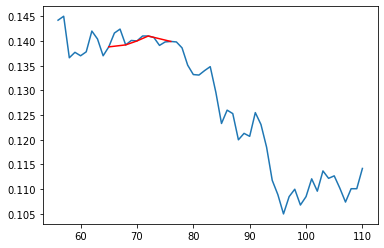

XMRUSDT
XRPUSDT
ZECUSDT
ZENUSDT
DGBUSDT


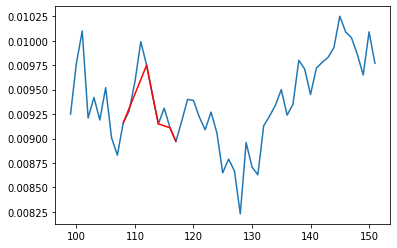

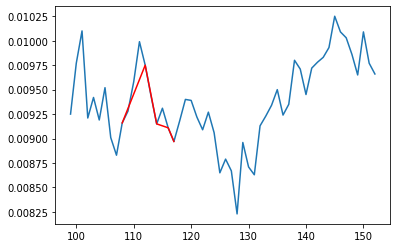

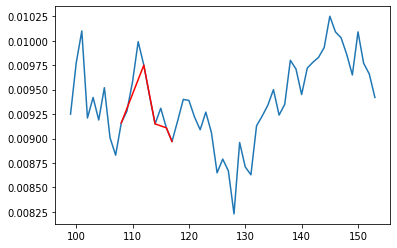

DASHUSDT
BCHUSDT
RNDRUSDT
KDAUSDT
NKNUSDT


In [58]:
# timeframes = ["1h"]

pairs= ['HOTUSDT', 'ARUSDT', 'SYSUSDT', 'CKBUSDT', 'CTXCUSDT', 'DOGEUSDT', 'ETCUSDT', 'FILUSDT', 'FIROUSDT', 'LTCUSDT',\
     'KMDUSDT', 'RVNUSDT', 'SCUSDT', 'XLMUSDT', 'XMRUSDT', 'XRPUSDT', 'ZECUSDT', 'ZENUSDT', 'DGBUSDT', 'DASHUSDT',\
         'BCHUSDT', 'RNDRUSDT', 'KDAUSDT', 'NKNUSDT']

# pairs=['BNBUSDT']

candy =[]

# for timeframe in timeframes:

for symbol in pairs:

    df = get_historical_ohlc_data(symbol,days=33, interval='1h')

    print(symbol)

    price = df.copy()
    ertiyab = 0.11

    l = price.Low.values[-49:]

    for i in range(55, len(price)):

        current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=2)

        d = current_pat_L[4]
        ## res = is_butterfly(ertiyab)
        res = is_gartley(ertiyab)

        # if (res == 1) & (d in l):
        if (res == 1) :
            plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
            plt.plot(current_idx, current_pat, c='r')
            plt.show()
            
            # print('65465465465464664646464654')

        

In [59]:
# # import os
# # import pandas as pd
# # import numpy as np
# # import telebot

# # import datetime as dt
# # from binance.client import Client

# # from ta.momentum import rsi
# # from ta.trend import ema_indicator

# # client=Client()
# # API_KEY = os.environ['API_KEY']
# # bot = telebot.TeleBot(API_KEY)


# # #timeframes = ["1h"]

# # pairs= ['HOTUSDT' ,'ARUSDT', 'SYSUSDT', 'CKBUSDT', 'CTXCUSDT', 'DOGEUSDT', 'ETCUSDT','FILUSDT',\
# #         'FIROUSDT', 'LTCUSDT', 'KMDUSDT', 'RVNUSDT', 'SCUSDT', 'XLMUSDT',\
# #         'XMRUSDT', 'XRPUSDT', 'ZECUSDT', 'ZENUSDT', 'DGBUSDT', 'DASHUSDT',\
# #         'BCHUSDT', 'RNDRUSDT', 'KDAUSDT', 'NKNUSDT']

# # def get_historical_ohlc_data(symbol,past_days=2,interval='1h'):
# #   df=pd.DataFrame(client.get_historical_klines(symbol=symbol,start_str="2 day ago UTC",interval=interval))
# #   df.columns=['open_time','open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
# #             'taker_base_vol', 'taker_quote_vol','is_best_match']
# #   df['open_date_time']=[dt.datetime.fromtimestamp(x/1000) for x in df.open_time]
# #   df=df[['open_date_time','open', 'high', 'low', 'close', 'volume']]
# #   df.set_index('open_date_time', inplace=True)
# #   return df

# # def clc(df):
# #   df['rsi'] = rsi(close=pd.to_numeric(df["close"], errors='ignore'), window=14)
# #   df['ema_rsi'] = ema_indicator(close=pd.to_numeric(df["rsi"], errors='ignore'), window=20)
# #   df['que'] = np.where((df['rsi'] < (df['ema_rsi']+df['ema_rsi']*0.03)) & (df['rsi'] > (df['ema_rsi']-df['ema_rsi']*0.03)), 1, 0)
# #   if (df['que'].iloc[-3] == 1) and (df['rsi'].iloc[-3] < df['rsi'].iloc[-2]):
# #     candy.append(f"{symbol}, {df.index[-3]}, {round(df['rsi'][-3],2)}")


# # ####################
    
# # @bot.message_handler(commands=['1'])
# # def hour(message):
# #   candy =[]
# #   bot.send_message(chat_id=message.chat.id, text = "running")

# #   for symbol in pairs:
# #     df = get_historical_ohlc_data(symbol, interval='1h')
      
# #     clc(df)
      
  
# #   print(candy)
  
# #   if len(candy) != 0:
# #     bot.send_message(chat_id=message.chat.id, text = "\n".join(candy))
# #   else:
# #     bot.send_message(chat_id=message.chat.id, text = "none")

# # #########################


# # @bot.message_handler(commands=['4'])
# # def quarters(message):
# #   candy =[]
# #   bot.send_message(chat_id=message.chat.id, text = "running")
# #   def get_historical_ohlc_data(symbol,past_days=2,interval='4h'):
# #     df=pd.DataFrame(client.get_historical_klines(symbol=symbol,start_str="2 day ago UTC",interval=interval))
# #     df.columns=['open_time','open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
# #               'taker_base_vol', 'taker_quote_vol','is_best_match']
# #     df['open_date_time']=[dt.datetime.fromtimestamp(x/1000) for x in df.open_time]
# #     df=df[['open_date_time','open', 'high', 'low', 'close', 'volume']]
# #     df.set_index('open_date_time', inplace=True)
# #     return df

# #   def clc(df):
# #     df['rsi'] = rsi(close=pd.to_numeric(df["close"], errors='ignore'), window=14)
# #     df['ema_rsi'] = ema_indicator(close=pd.to_numeric(df["rsi"], errors='ignore'), window=20)
# #     df['que'] = np.where((df['rsi'] < (df['ema_rsi']+df['ema_rsi']*0.03)) & (df['rsi'] > (df['ema_rsi']-df['ema_rsi']*0.03)), 1, 0)
# #     if (df['que'].iloc[-3] == 1) and (df['rsi'].iloc[-3] < df['rsi'].iloc[-2]):
# #       candy.append(f"{symbol}, {df.index[-3]}, {round(df['rsi'][-3],2)}")

  

    

# #   for symbol in pairs:
# #     df = get_historical_ohlc_data(symbol, interval='15m')
      
# #     clc(df)
      
  
# #   print(candy)
  
# #   if len(candy) != 0:
# #     bot.send_message(chat_id=message.chat.id, text = "\n".join(candy))
# #   else:
# #     bot.send_message(chat_id=message.chat.id, text = "none")

# # ######################


# # bot.polling()



# df['que'] = np.where((df['rsi'] < (df['ema_rsi']+df['ema_rsi']*0.03)) & (df['rsi'] > (df['ema_rsi']-df['ema_rsi']*0.03)), 1, 0)
# if (df['que'].iloc[-3] == 1) and (df['rsi'].iloc[-3] < df['rsi'].iloc[-2]):
#   candy.append(f"{symbol}, {df.index[-3]}, {round(df['rsi'][-3],2)}")

# ###

# df['que'] = np.where(((df['rsi'] - df['ema_rsi']) <= 1), 1, 0)
# if (df['que'].iloc[-2] == 1) and (df['rsi'].iloc[-3] > df['rsi'].iloc[-2]):
#   candy.append(f"{symbol}, {df.index[-2]}, {round(df['rsi'][-2],2)}")




# def rsi_tradingview(df: pd.DataFrame, period: int = 14, round_rsi: bool = True):

#   delta = df["close"].diff()

#   up = delta.copy()
#   up[up < 0] = 0
#   up = pd.Series.ewm(up, alpha=1/period).mean()

#   down = delta.copy()
#   down[down > 0] = 0
#   down *= -1
#   down = pd.Series.ewm(down, alpha=1/period).mean()

#   rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))
#   df['rsi'] = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

#   return np.round(rsi, 2) if round_rsi else rsi




# N = 14
# close_price0 = df.close[0]
# gain_avg0 = loss_avg0 = close_price0
# for kline in df.close:
#     close_price = float(kline[4])
#     if close_price > close_price0:
#         gain = close_price - close_price0
#         loss = 0
#     else:
#         gain = 0
#         loss = close_price0 - close_price
#     close_price0 = close_price
#     gain_avg = (gain_avg0 * (N - 1) + gain) / N
#     loss_avg = (loss_avg0 * (N - 1) + loss) / N
#     rsi = 100 - 100 / (1 + gain_avg / loss_avg)
#     gain_avg0 = gain_avg
#     loss_avg0 = loss_avg




# def get_rsi(df, lookback):

#   ret = df.close.diff()
#   up = []
#   down = []
#   for i in range(len(ret)):
#       if ret[i] < 0:
#           up.append(0)
#           down.append(ret[i])
#       else:
#           up.append(ret[i])
#           down.append(0)
#   up_series = pd.Series(up)
#   down_series = pd.Series(down).abs()
#   up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
#   down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
#   rs = up_ewm/down_ewm
#   rsi = 100 - (100 / (1 + rs))
#   #print(rsi)
#   rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(df.index)
#   #rsi_df = rsi_df.dropna()
#   #return rsi_df[3:]
#   frames = [df, rsi_df]
  
#   result = pd.concat(frames, axis=1, join='inner')
#   print(result)
  
#   #df['rsi'] = rsi
#   #print(df.rsi)
#   return result








In [60]:
# test all pairs 

# timeframe='4h'
   
# outdir=f"{os.getcwd()}/data/{timeframe}"

# for filename in os.listdir(outdir):
#     # symbol = filename.replace(f\"_{timeframe}.csv\",\"\")
#     df = pd.read_csv(f"{outdir}/{filename}")
#     df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
#     df = df.set_index(df.Time)

#     print(filename)

#     price = df.copy()
#     ertiyab = 0.11

#     for i in range(100, len(price)):

#         current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=2)
#         # res = is_butterfly(ertiyab)
#         res = is_gartley(ertiyab)

#         if res == 1:
#             plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
#             plt.plot(current_idx, current_pat, c='r')
#             plt.show()
